Step 1: Introduction

Data Description:

The dataset is sourced from the Aspiring Mind Employment Outcome 2015 (AMEO) study, focusing on engineering graduates. It contains approximately 4000 data points across 40 independent variables, which include demographic information, educational performance metrics, and employment outcomes.

**Objective:**

The primary goal of this analysis is to explore how various independent variables impact the target variable (Salary) while also examining other relationships within the dataset. Specifically, this report will analyze univariate and bivariate relationships, test a claim regarding salary expectations for recent engineering graduates, and explore the relationship between gender and specialization.

**Step 1: Importing Libraries and Loading the Dataset**

In [2]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
data = pd.read_excel('/content/data.xlsx')

In [3]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
data.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [7]:
# shape
# Displaying the shape of the dataset (rows, columns)
print(f"Shape of the dataset: {data.shape}")




Shape of the dataset: (3998, 39)


In [8]:
# Summary statistics of the dataset
data.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,NaN,67,419,339,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,NaN,present,software engineer,Bangalore,m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,NaN,1875,539,627,3041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,NaN,NaN,NaN,NaN,1990-12-06 06:01:15.637819008,77.925443,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,NaN,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,43.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,NaN,NaN,NaN,NaN,1989-11-16 06:00:00,71.680000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,NaN,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,NaN,NaN,NaN,NaN,1991-03-07 12:00:00,79.150000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,NaN,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,NaN,NaN,NaN,NaN,1992-03-13 18:00:00,85.670000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,NaN,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,97.760000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


**Step 3: Univariate Analysis**

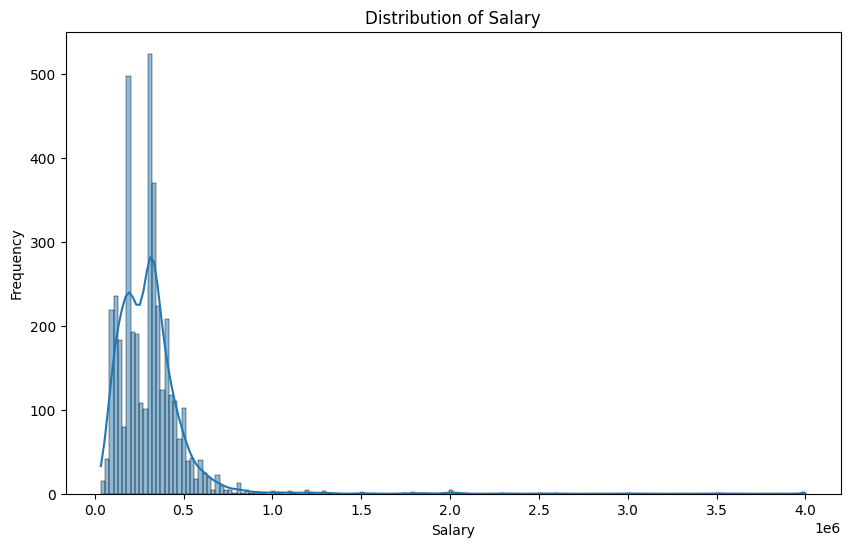

In [9]:
# Histogram for Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


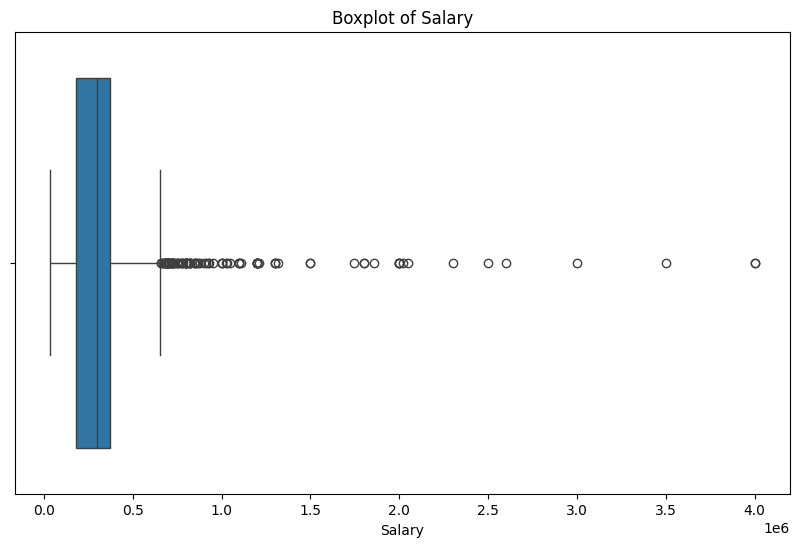

In [10]:


# Boxplot for Salary to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Salary'])
plt.title('Boxplot of Salary')
plt.show()


**3.2 Countplot for Gender**

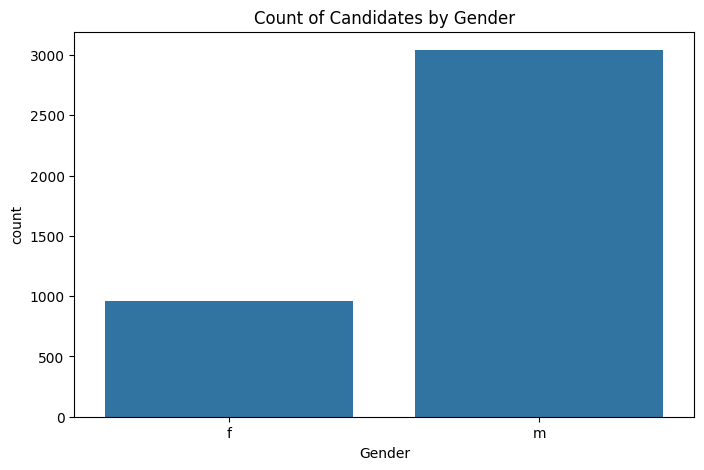

In [12]:
# Countplot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Count of Candidates by Gender')
plt.show()


**Step 4: Bivariate Analysis**

In [16]:
# Check the column names in the dataset
print(data.columns)


Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


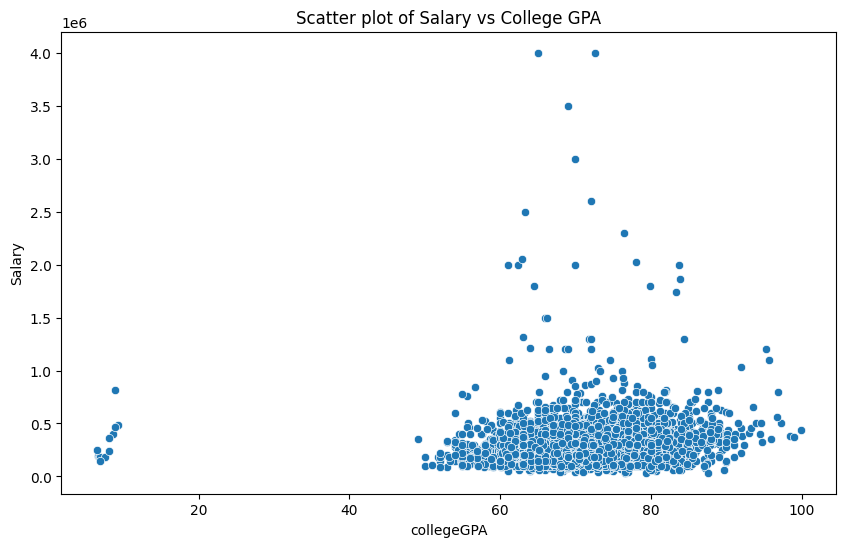

In [17]:
# Scatter plot to check relationship between College GPA and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=data)
plt.title('Scatter plot of Salary vs College GPA')
plt.show()


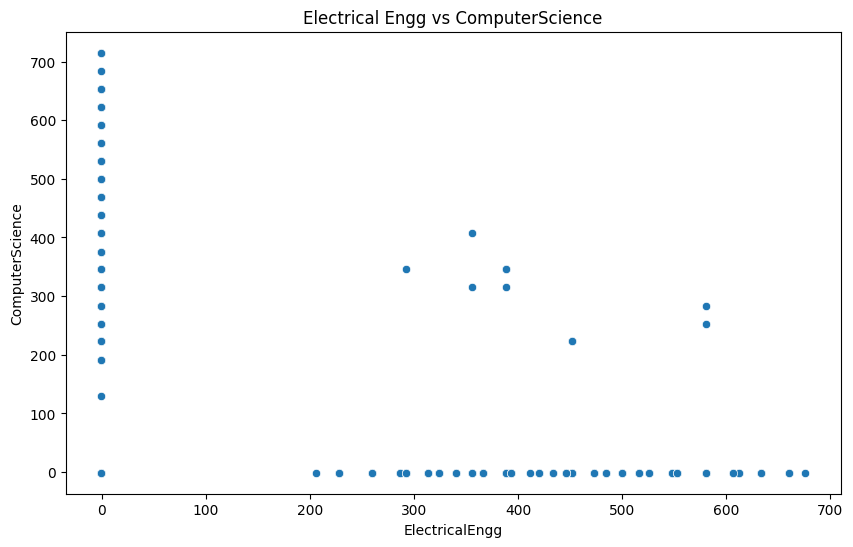

In [18]:
# Scatter plot to check relationship between College GPA and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ElectricalEngg', y='ComputerScience', data=data)
plt.title('Electrical Engg vs ComputerScience')
plt.show()


Histogram

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


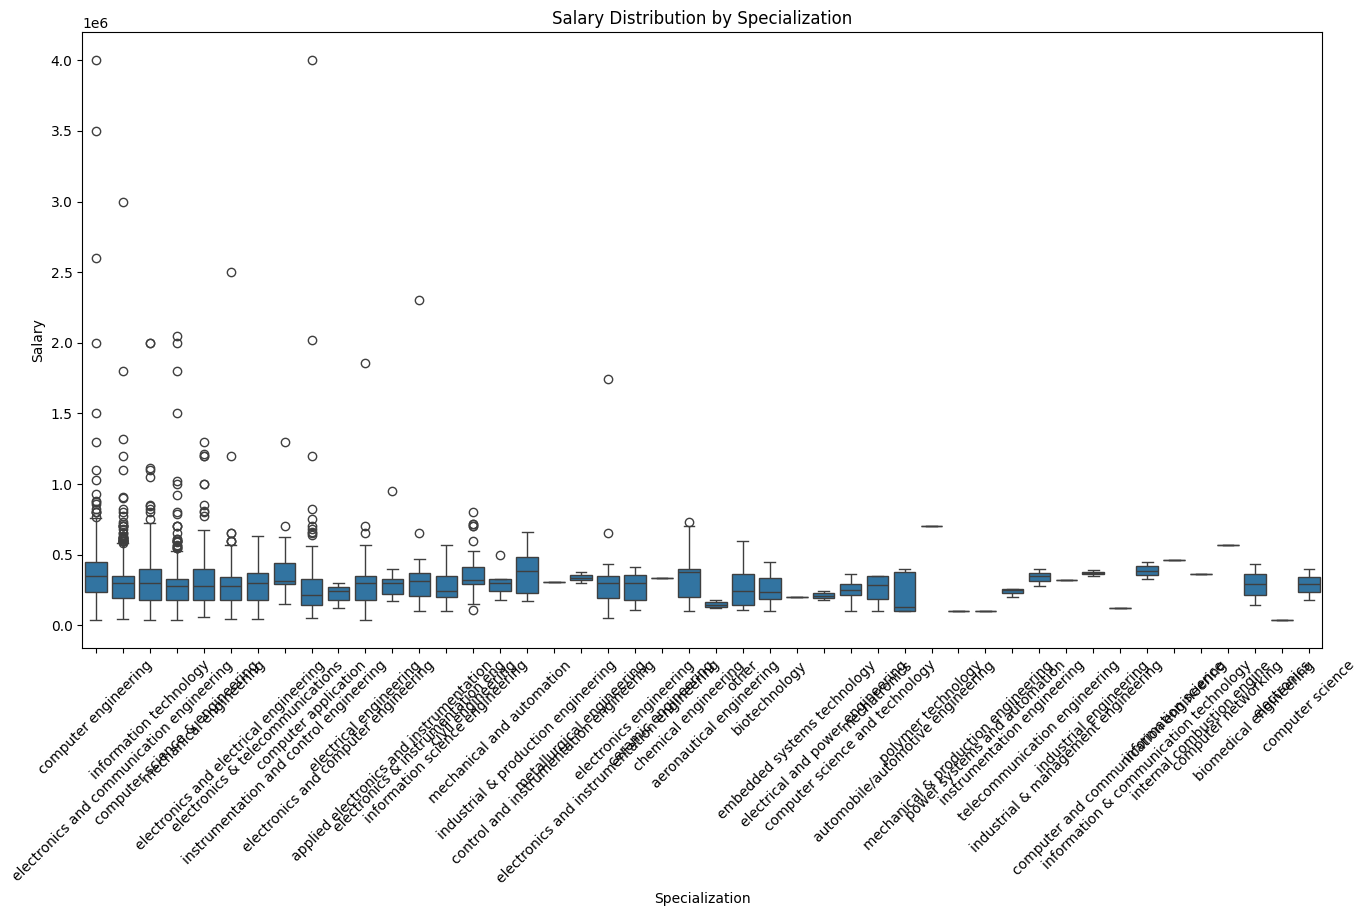

In [15]:
# Boxplot to visualize how Salary varies across Specializations
plt.figure(figsize=(16, 8))
sns.boxplot(x='Specialization', y='Salary', data=data)
plt.title('Salary Distribution by Specialization')
plt.xticks(rotation=45)
plt.show()


 Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


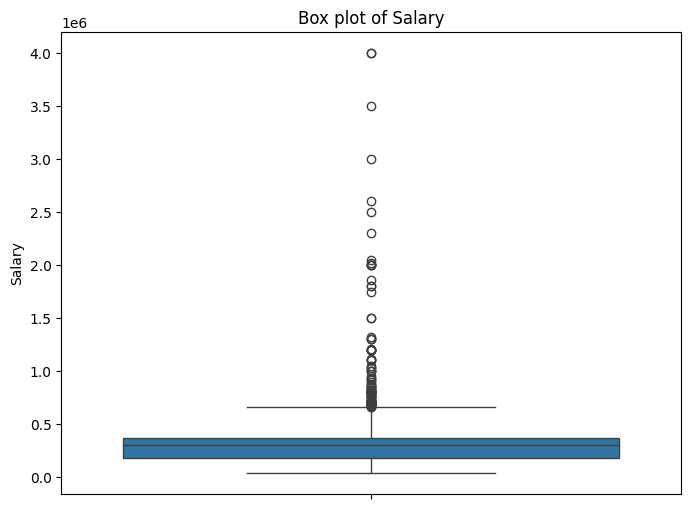

In [21]:
# Box plot for Salary
plt.figure(figsize=(8, 6))
sns.boxplot(y='Salary', data=data)
plt.title('Box plot of Salary')
plt.show()


Count Plot

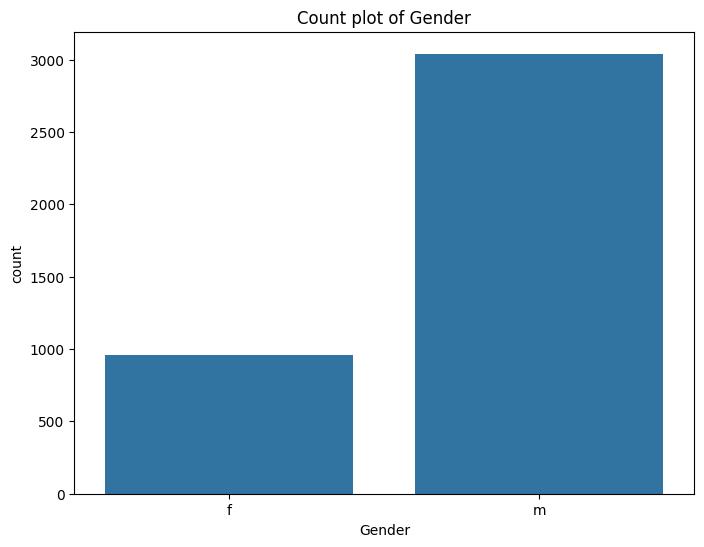

In [22]:
# Count plot for Gender

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Count plot of Gender')
plt.show()


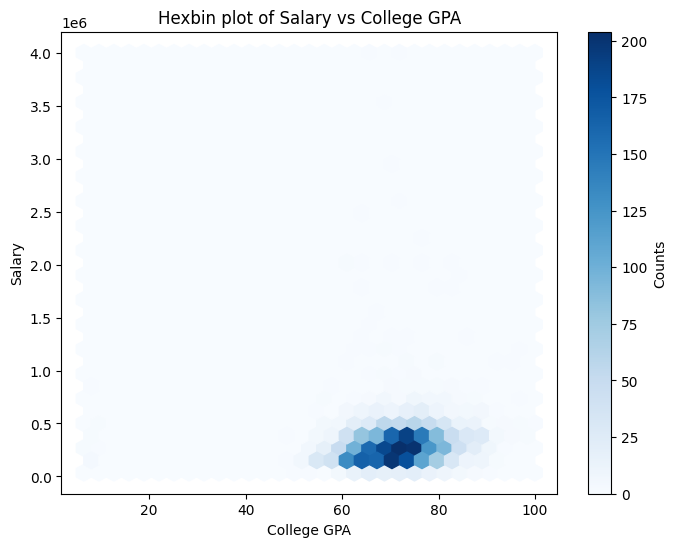

In [26]:
# Hexbin plot for College GPA vs Salary
plt.figure(figsize=(8, 6))
plt.hexbin(data['collegeGPA'], data['Salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('Hexbin plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()


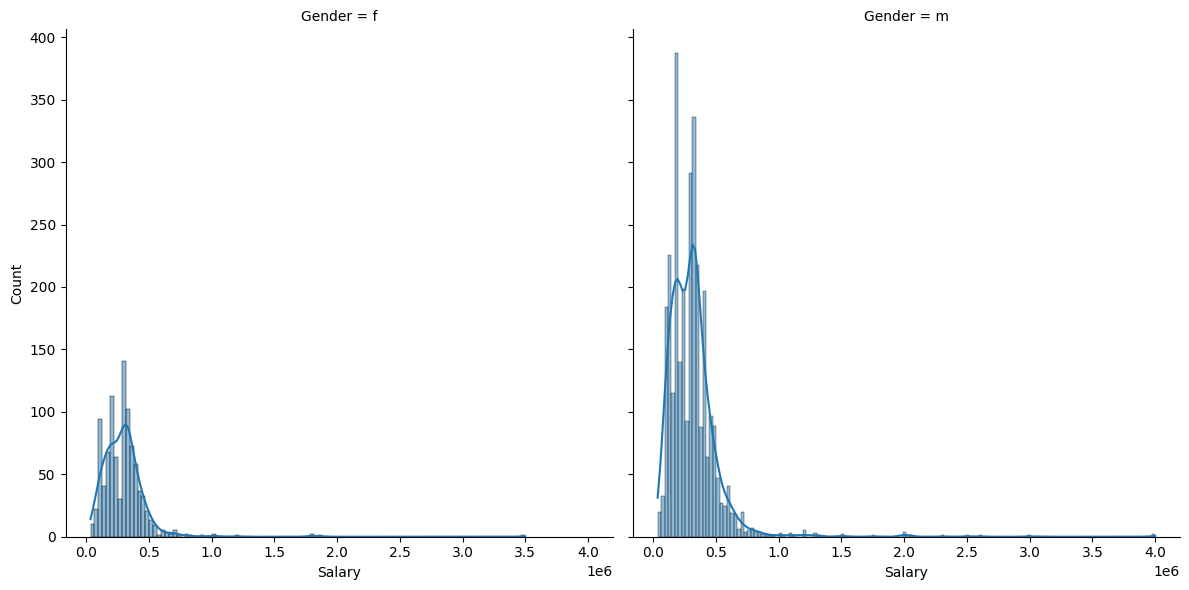

In [24]:
# FacetGrid for Salary distribution by Gender
g = sns.FacetGrid(data, col='Gender', height=6, aspect=1)
g.map(sns.histplot, 'Salary', kde=True)
plt.show()


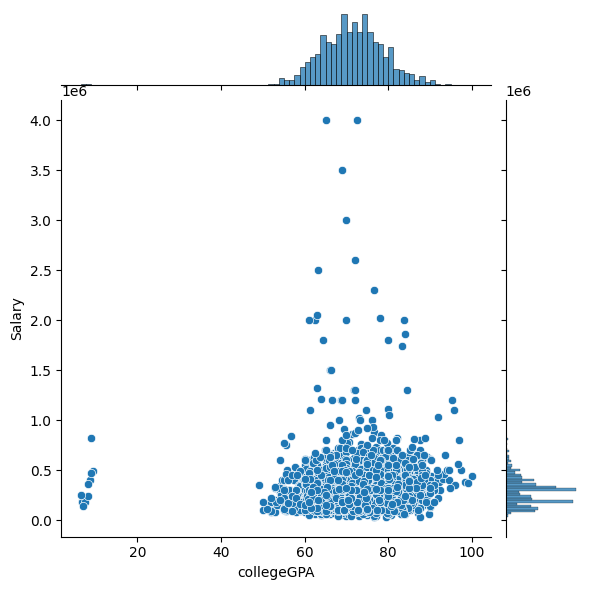

In [25]:
# Joint plot of College GPA vs Salary
sns.jointplot(x='collegeGPA', y='Salary', data=data, kind='scatter')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


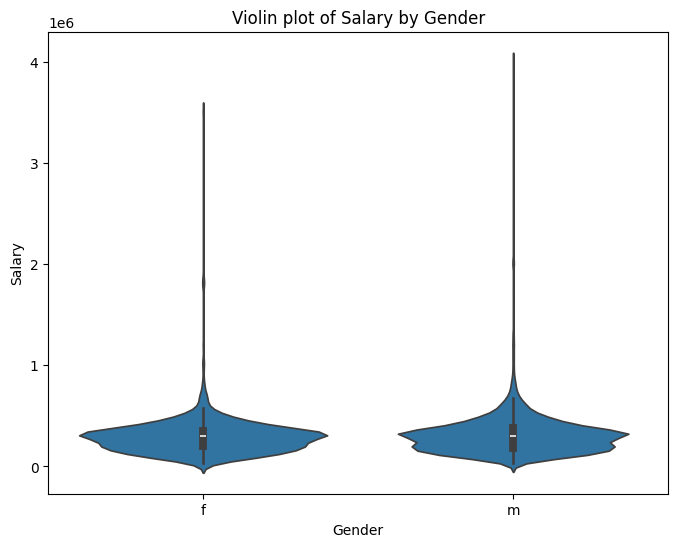

In [28]:
# Violin plot of Salary vs Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Salary', data=data)
plt.title('Violin plot of Salary by Gender')
plt.show()


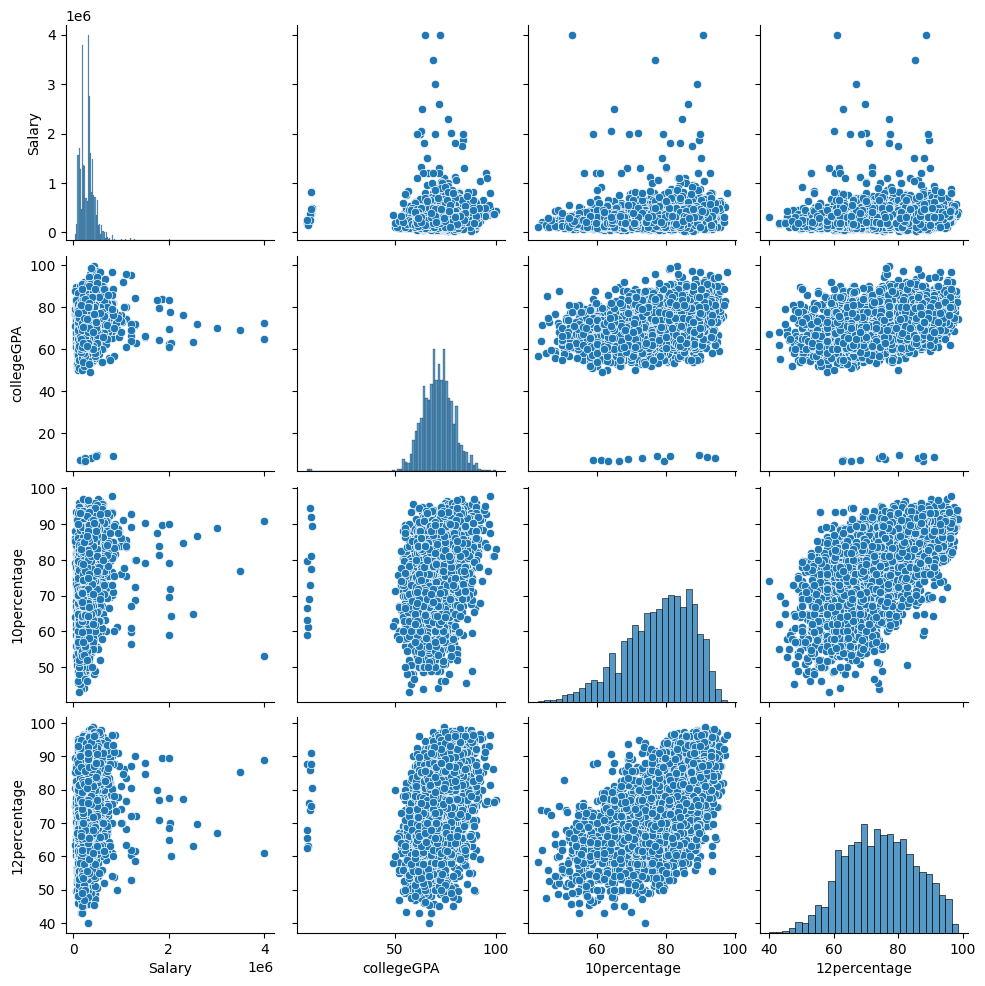

In [30]:
# Pair plot for selected numerical columns
sns.pairplot(data[['Salary', 'collegeGPA', '10percentage', '12percentage']])
plt.show()


 Categorical-Numerical Relationships

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


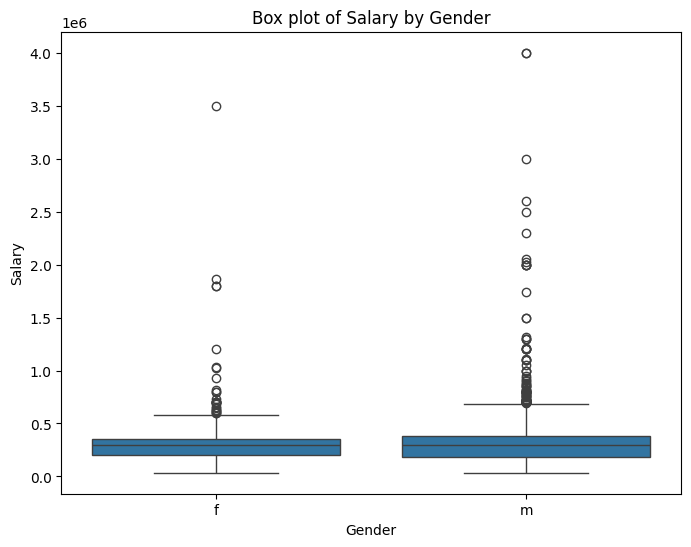

In [31]:
# Box plot of Salary by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Box plot of Salary by Gender')
plt.show()


 Swarm Plot:

  Swarm plots help visualize the spread of numerical data points across categorical variables without overlapping.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-

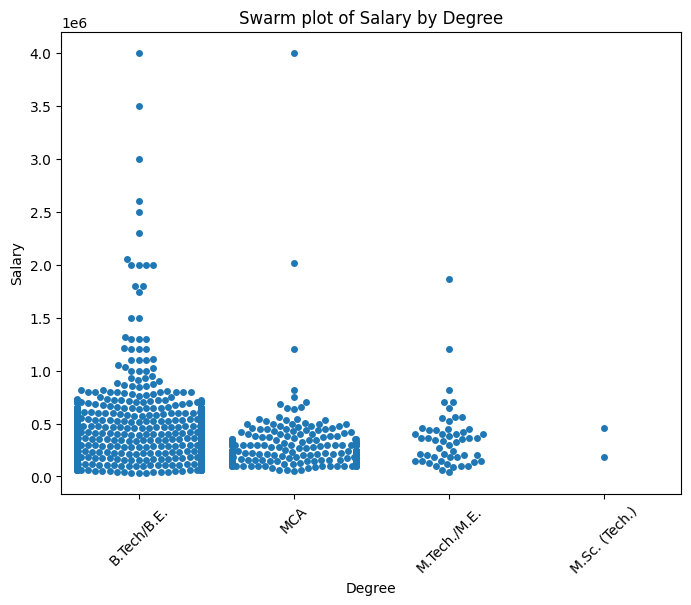

In [32]:
# Swarm plot of Salary by Degree
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Degree', y='Salary', data=data)
plt.title('Swarm plot of Salary by Degree')
plt.xticks(rotation=45)
plt.show()


**Multiple Scatter Plots in Subplots**

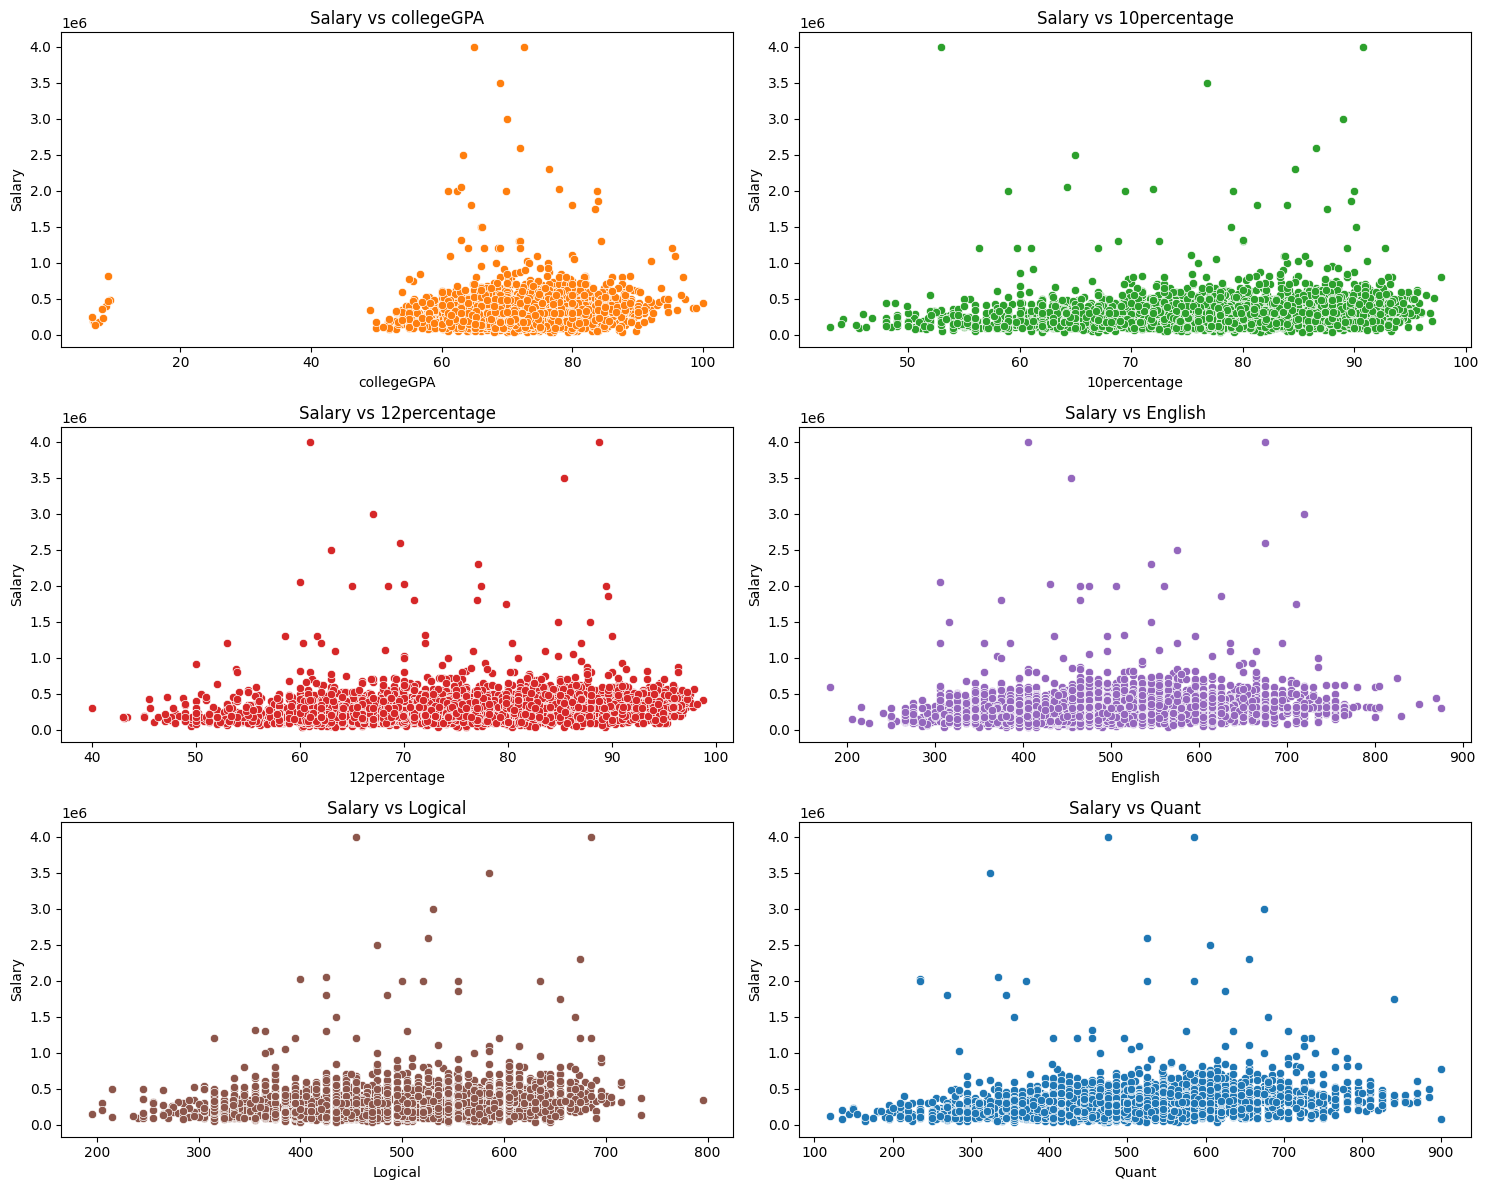

In [19]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot against Salary
numerical_columns = ['collegeGPA', '10percentage', '12percentage', 'English', 'Logical', 'Quant']

# Creating subplots
plt.figure(figsize=(15, 12))

# Loop over the numerical columns and create scatter plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # Adjust the grid (3 rows, 2 columns)
    sns.scatterplot(x=col, y='Salary', data=data, color=sns.color_palette()[i % 6])  # Using different colors
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


**Step 5: Research Questions**

5.1 Testing Salary Claim (2.5-3 Lakhs for Certain Job Titles)

In [33]:
# Testing the claim for specific job titles
job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
salaries = data[data['Designation'].isin(job_titles)]['Salary']

# Descriptive statistics for the salary of selected job titles
salaries.describe()


,Salary
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


5.2 Analyzing Relationship Between Gender and Specialization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


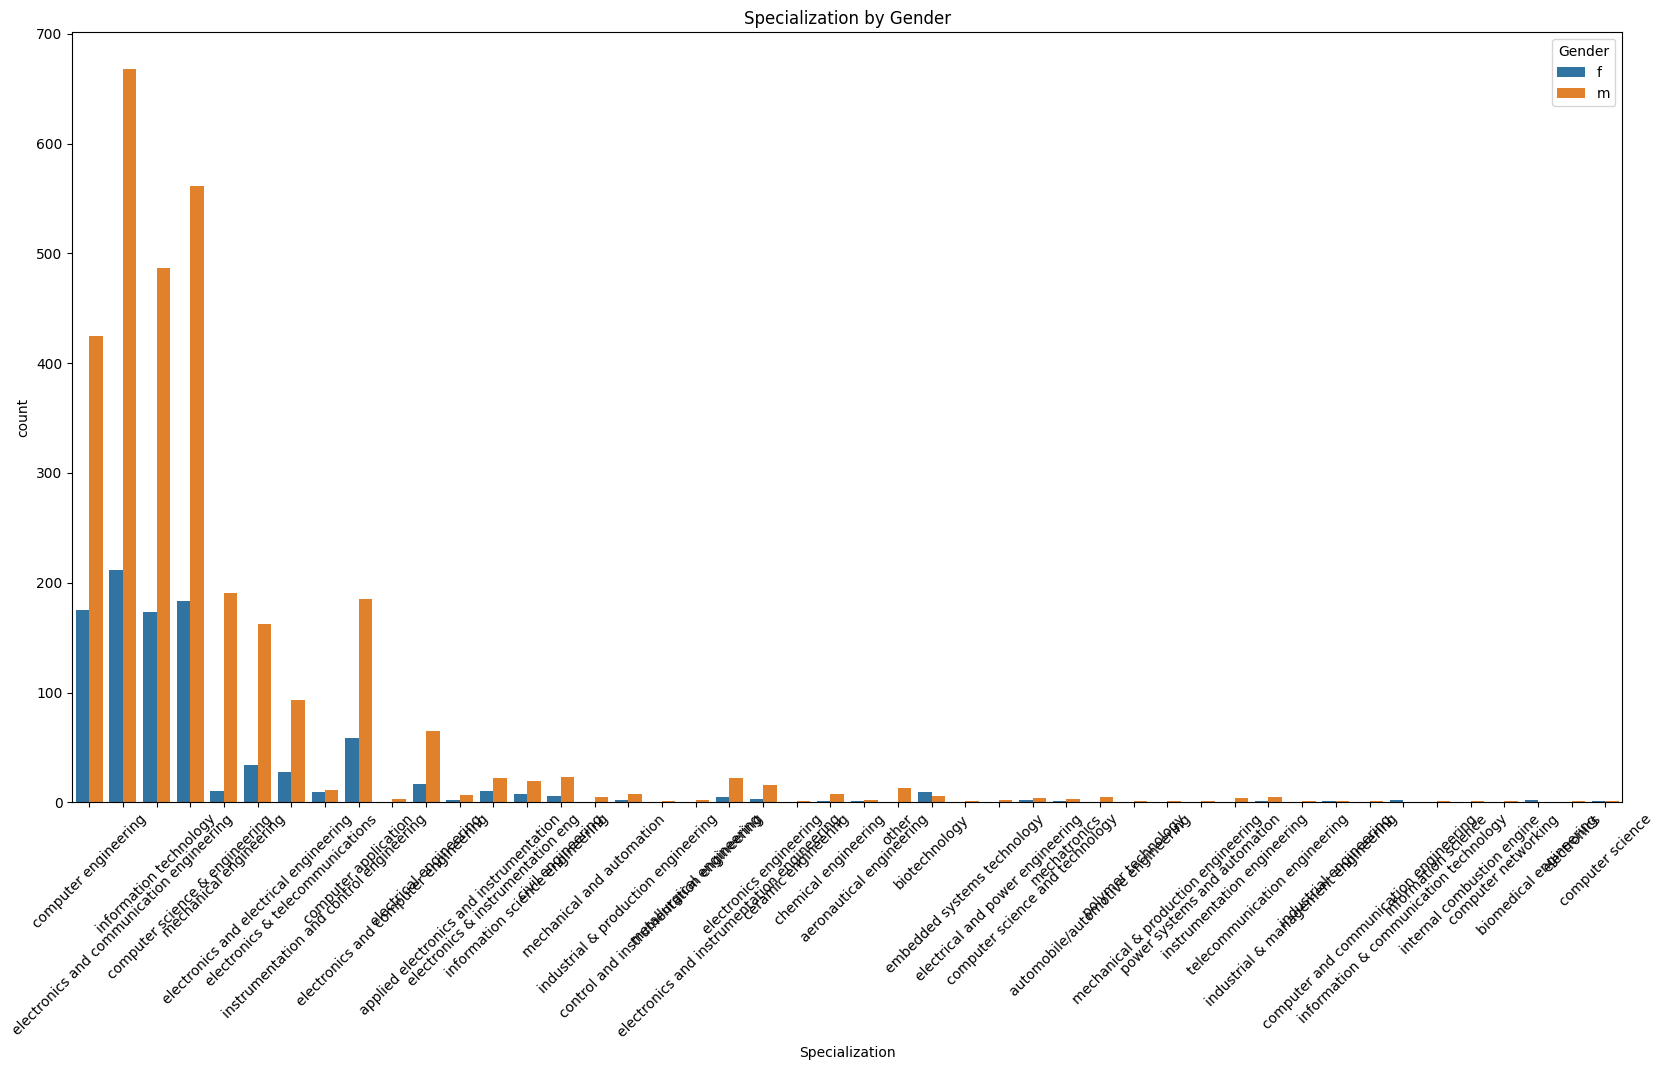

In [36]:
# Countplot to analyze specialization preferences by gender
plt.figure(figsize=(20, 10))
sns.countplot(x='Specialization', hue='Gender', data=data)
plt.title('Specialization by Gender')
plt.xticks(rotation=45)
plt.show()


Step 6: Conclusion

In this section, summarize the key insights and conclusions derived from the exploratory data analysis. Below is an example structure of the conclusion based on the steps you've followed:

Salary Distribution: The salary data is right-skewed, with most candidates earning below the median salary and a few earning significantly higher, indicating some outliers.

Key Insights:

College GPA vs Salary: A weak positive correlation was observed, suggesting higher GPAs do not necessarily lead to significantly higher salaries.
Specialization: Graduates from technical fields, such as Computer Science and Electronics, tend to earn higher salaries compared to other specializations.
Research Questions:

Salary Claim: Fresh graduates in roles like Software Engineer and Programming Analyst generally earn between 2.5-3 lakhs, as claimed.
Gender and Specialization: Both genders tend to choose similar specializations, with a slight male preference for mechanical fields.
Final Insight: Strong technical skills, particularly in programming, are key factors in securing higher salaries for engineering graduates.

This concise summary highlights the main findings from the exploratory data analysis.